In [4]:
import numpy as np 
import pandas as pd
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from commonfunctions import *
import pickle

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

X_train = df_train.drop(columns='label')
X_test = df_test.copy()

y_train = df_train['label']
Y_train = pd.get_dummies(y_train)

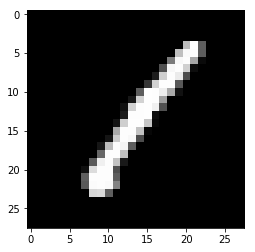

In [6]:
img = X_train.iloc[0].values.reshape((28, 28))
plt.imshow(img, cmap='gray');

In [7]:
def hog_features(X, imgshape=(28, 28), pixels_per_cell=(8, 8)):
    features = []
    for row in X:
        img = row.reshape(imgshape)
        img_feature = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(1, 1))
        features.append(img_feature)

    return np.array(features)

In [ ]:
X_train = hog_features(X_train.values, pixels_per_cell=(8, 8))
X_test = hog_features(X_test.values, pixels_per_cell=(8, 8))

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=72, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


In [10]:
X_train_normalized = normalize(X_train)
history = model.fit(X_train_normalized, Y_train, epochs=20,
                    batch_size=5, verbose=1)

W1207 17:39:24.906184  3500 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
42000/42000 [==============================] - 20s 466us/step - loss: 0.4159 - acc: 0.8678
Epoch 2/20
42000/42000 [==============================] - 15s 368us/step - loss: 0.2425 - acc: 0.9226
Epoch 3/20
42000/42000 [==============================] - 16s 372us/step - loss: 0.2068 - acc: 0.9336
Epoch 4/20
42000/42000 [==============================] - 16s 369us/step - loss: 0.1901 - acc: 0.9394
Epoch 5/20
42000/42000 [==============================] - 16s 382us/step - loss: 0.1780 - acc: 0.9430
Epoch 6/20
42000/42000 [==============================] - 16s 375us/step - loss: 0.1655 - acc: 0.9460
Epoch 7/20
42000/42000 [==============================] - 16s 378us/step - loss: 0.1558 - acc: 0.9496
Epoch 8/20
42000/42000 [==============================] - 16s 391us/step - loss: 0.1516 - acc: 0.9509
Epoch 9/20
42000/42000 [==============================] - 16s 373us/step - loss: 0.1454 - acc: 0.9526
Epoch 10/20
42000/42000 [==============================] - 16s 372us/step - loss: 

In [11]:
X_test_normalized = normalize(X_test)
y_pred = model.predict_classes(X_test_normalized)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


[4]


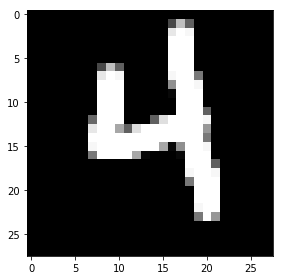

In [13]:
img = io.imread("test.tif")
io.imshow(img)
img_features = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1))

XDigit = np.array([img_features])
XDigit = normalize(XDigit)
y_pred = model.predict_classes(XDigit)
print(y_pred)

In [14]:
filename = 'hog_model.sav'
pickle.dump(model, open(filename, 'wb'))
